
Computational astrophy test site:¶

co owned by Sarah Kok, Maria Georganti and Athul Muralidhar Jan, 2018

This source code is written in Python-3 All values in AU, Solar system units


In [50]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook 
from time import time
from matplotlib import animation

from scipy.optimize import curve_fit

<IPython.core.display.Javascript object>


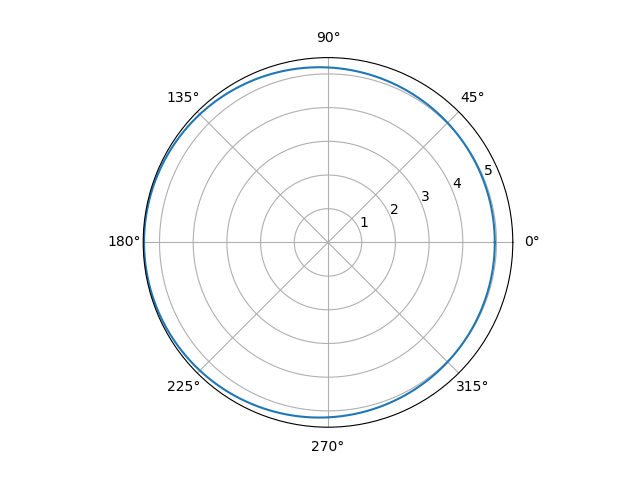

'\nreferences:\nhttps://nssdc.gsfc.nasa.gov/planetary/factsheet/jupiterfact.html\nhttps://en.wikipedia.org/wiki/Kepler%27s_laws_of_planetary_motion\n'

In [2]:
cos = np.cos
pi = np.pi

a = 5.204 # semimajor axis - Jupiter
e = 0.0489 # orbital eccentricity-Jupiter
theta = np.linspace(0, 2*pi, 360) # degrees
r = (a*(1-e**2))/(1+e*cos(theta)) # Kepler's law for orbits
 
plt.polar(theta, r)
plt.show()

"""
references:
https://nssdc.gsfc.nasa.gov/planetary/factsheet/jupiterfact.html
https://en.wikipedia.org/wiki/Kepler%27s_laws_of_planetary_motion
"""

<IPython.core.display.Javascript object>


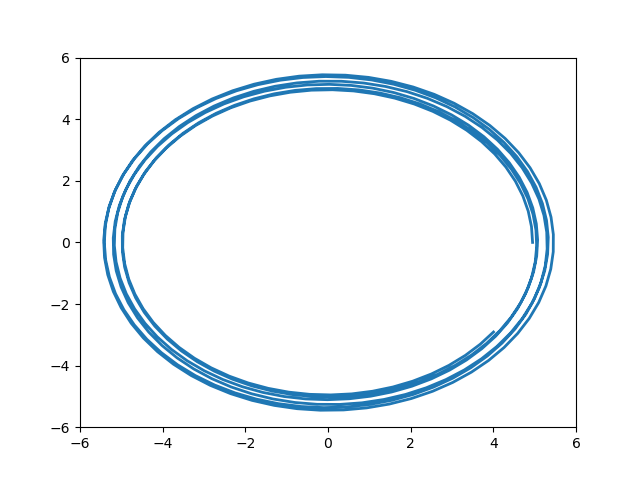

time taken: 0.06225228309631348


In [3]:
s = time()
"""
Matplotlib Animation Example

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!

 ref : https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/
"""



cos = np.cos
sin = np.sin
pi = np.pi

a = 5.204 # semimajor axis - Jupiter
e = 0.0489 # orbital eccentricity-Jupiter
theta = np.linspace(0, 2*pi, 360) # degrees
r = (a*(1-e**2))/(1+e*cos(theta)) # Kepler's law for orbits


# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(-6, 6), ylim=(-6, 6))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = r*cos(theta*0.1*i)
    y = r*sin(theta*0.1*i)
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
# anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

e = time()
print('time taken:',e-s)


Eqns to slove:
$$\dot x _{i+1} = x_{i}+hv_{i}$$$$\dot{v}_{i+1} = v_{i}-\frac{4\pi^{2}hx_{i}}{\cos(\theta)(x^{2}+y^{2})^{3/2}}$$$$\dot y _{i+1} = y_{i}+hu_{i}$$$$\dot{u}_{i+1} = u_{i}-\frac{4\pi^{2}hy_{i}}{\sin(\theta)(x^{2}+y^{2})^{3/2}}$$


In [9]:
a = 5.204
e = 0.0489 
h = 0.005
s = time()

def eul_fwd(h,theta,prev):
    r = (prev[0]**2+prev[2]**2)**3/2
    matrix_x = np.array([[1,h],[-4*np.pi**2*h*np.cos(theta)/r,1]])
    matrix_y = np.array([[1,h],[-4*np.pi**2*h*np.sin(theta)/r,1]])
    
    xvprev = np.array([prev[0],prev[1]])
    yuprev = np.array([prev[2],prev[3]])
    
    xv = np.dot(matrix_x,xvprev)
    yu = np.dot(matrix_y,yuprev)
#     print(xv)
#     print(np.array([xv,yu]))
    return np.array([xv,yu])



theta = np.linspace(0.1,2*np.pi)
j=1
res_x = []
res_v = []
res_y = []
res_u = []

for i in theta:
    if j==1:
        prev = [1,0,5.204*(1-0.0489),-((4*np.pi**2*(1+0.0489))/(5.204*(1-0.0489)))**1/2] #x,v,y,u
    else:
        prev[0] = a[0][0]
        prev[1] = a[0][1]
        prev[2] = a[1][0]
        prev[3] = a[1][1]
    
    a = eul_fwd(h,i,prev)
    res_x.append(a[0][0])
    res_v.append(a[0][1])
    res_y.append(a[1][0])
    res_u.append(a[1][1])
    j=j+1

print(res_v)
# print(res_xv)
# plt.plot(theta,res[:][0])
e = time()
print('time taken:',e-s)

[-2.3696102752276114e-05, -4.7478014231853131e-05, -7.0950223378108155e-05, -9.3702405717036768e-05, -0.00011531541901753651, -0.00013536774739620458, -0.00015344231337562734, -0.00016913356749478496, -0.00018205475607162194, -0.00019184525980947006, -0.00019817788929579603, -0.00020076601822827429, -0.00019937043157089055, -0.0001938057639271685, -0.00018394640333560067, -0.00016973173753974044, -0.0001511706236344604, -0.00012834496788718283, -0.00010141231049737131, -7.0607320078784993e-05, -3.6242114685695791e-05, 1.2946598166979132e-06, 4.1540047421868013e-05, 8.3960331562524319e-05, 0.0001279559334339957, 0.00017286765553157075, 0.00021798424542645019, 0.00026255123253844301, 0.00030578096787070564, 0.00034686377367174601, 0.00038498008712382567, 0.00041931345978445963, 0.00044906425300271003, 0.00047346384927741887, 0.00049178918090733194, 0.00050337736068818662, 0.00050764018521605708, 0.0005040782699216802, 0.00049229456662782333, 0.00047200700950349785, 0.000443060034062507, 

<IPython.core.display.Javascript object>


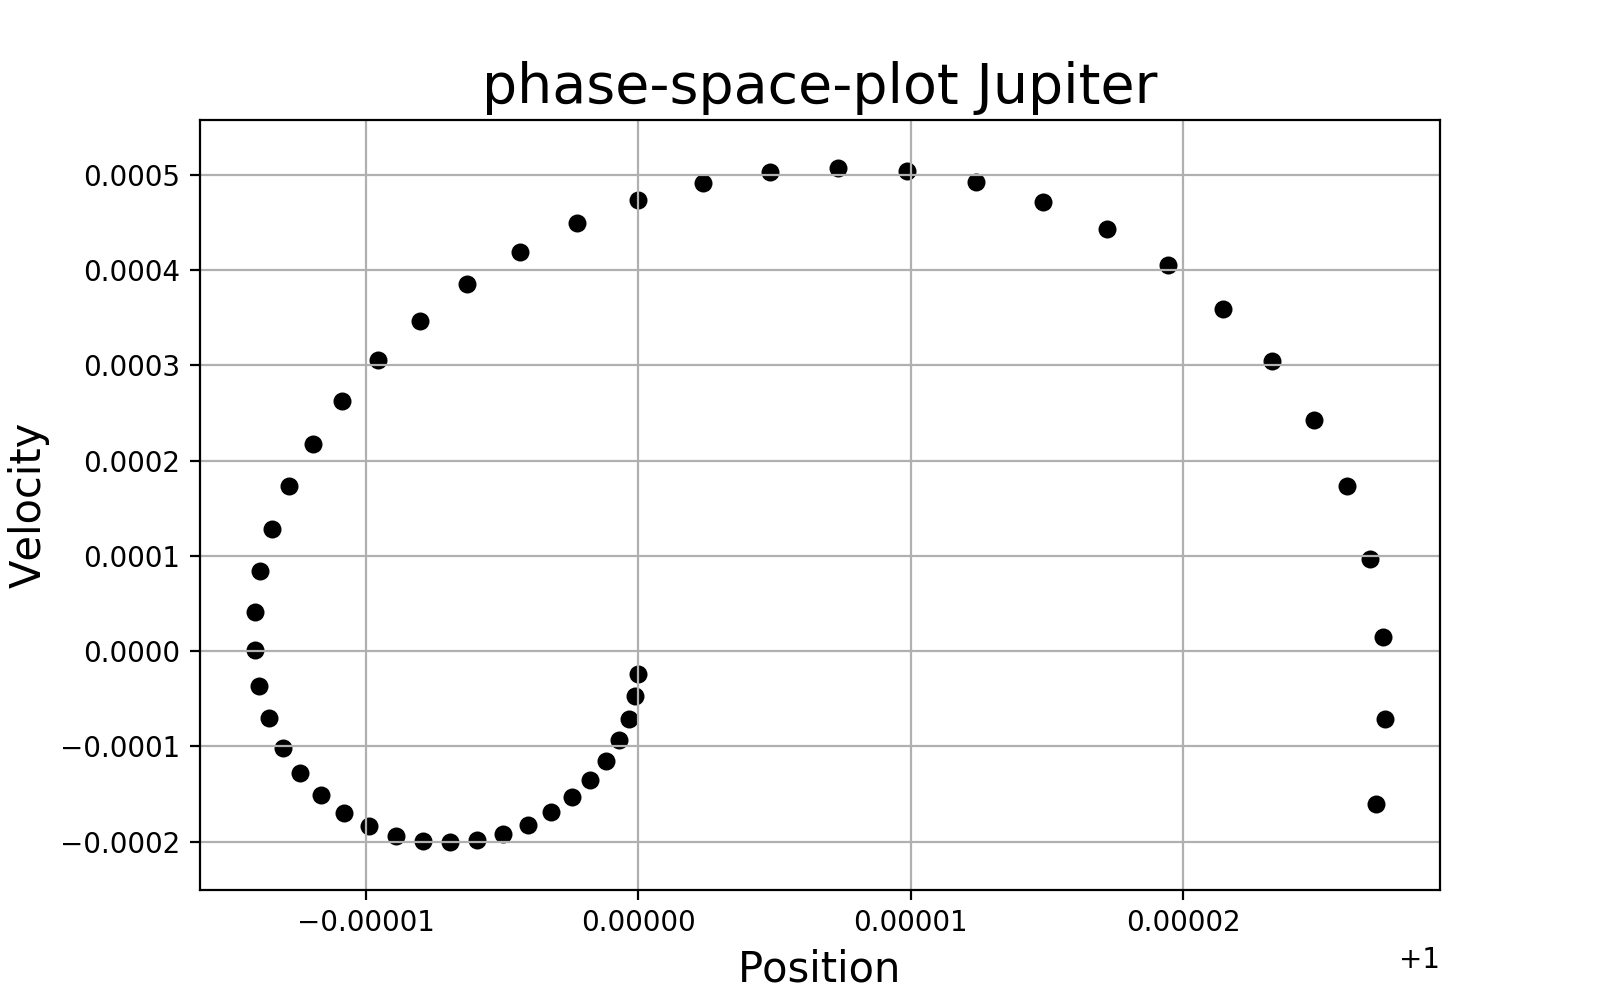

In [52]:
fig, ax = plt.subplots(1,1,figsize=(8,5))

ax.scatter(res_x, res_v, c='black', s=30)

ax.set_xlim(min(res_x)-0.000002,max(res_x)+0.000002)
ax.set_ylim(min(res_v)-0.00005,max(res_v)+0.00005)

ax.set_xlabel("Position", fontsize=15)
ax.set_ylabel("Velocity", fontsize=15)
ax.set_title("phase-space-plot Jupiter", fontsize=20)

ax.grid()

plt.show()